In [6]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [3]:
faces.data.shape

(1348, 2914)

In [5]:
faces.target.shape
#图像个数

(1348,)

In [7]:
pd.DataFrame(faces.data).head()

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,138.000000,135.666672,127.666664,120.666664,117.000000,119.666664,125.666664,133.333328,137.666672,143.666672,...,113.000000,24.333334,4.000000,2.666667,1.666667,0.333333,1.333333,1.666667,1.666667,0.666667
1,71.000000,56.333332,67.666664,91.333336,91.666664,71.666664,101.333336,124.666664,124.000000,127.333336,...,236.666672,248.666672,252.333328,253.666672,253.000000,254.000000,252.000000,247.666672,243.000000,238.333328
2,84.666664,97.333336,72.666664,56.333332,94.666664,118.333336,123.333336,128.333328,130.000000,134.666672,...,84.000000,91.000000,106.666664,116.666664,123.000000,119.000000,102.000000,114.333336,194.333328,241.000000
3,68.333336,81.666664,121.666664,135.000000,138.666672,141.333328,142.000000,148.666672,159.666672,171.333328,...,90.000000,103.666664,165.000000,224.333328,232.333328,228.666672,229.666672,229.333328,224.666672,206.666672
4,56.333332,55.333332,47.333332,47.333332,50.333332,44.333332,44.666668,52.333332,61.666668,55.333332,...,42.000000,39.666668,37.333332,34.333332,34.666668,35.000000,34.333332,34.666668,35.666668,34.000000


In [9]:
faces.images.shape
#1348是图像个数,62是单张图的行,47是单张图的列

(1348, 62, 47)

In [10]:
x=faces.data

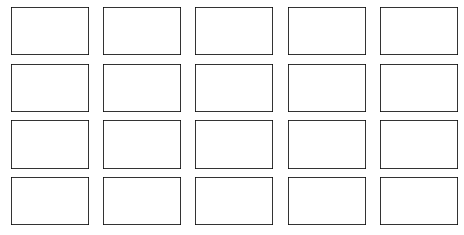

In [21]:
#创建画布和子图对象
fig, axes = plt.subplots(4,5
                       ,figsize=(8,4)
                       ,subplot_kw = {"xticks":[],"yticks":[]} #不要显示坐标轴
                       )

In [14]:
#不难发现，axes中的一个对象对应fig中的一个空格
#我们希望，在每一个子图对象中填充图像（共24张图），因此我们需要写一个在子图对象中遍历的循环
axes.shape

(4, 5)

In [16]:
enumerate(axes.flat)
#二维结构，可以有两种循环方式，一种是使用索引，循环一次同时生成一列上的三个图
#另一种是把数据拉成一维，循环一次只生成一个图
#在这里，究竟使用哪一种循环方式，是要看我们要画的图的信息，储存在一个怎样的结构里
#我们使用 子图对象.imshow 来将图像填充到空白画布上
#而imshow要求的数据格式必须是一个(m,n)格式的矩阵，即每个数据都是一张单独的图
#因此我们需要遍历的是faces.images，其结构是(1277, 62, 47)
#要从一个数据集中取出24个图，明显是一次性的循环切片[i,:,:]来得便利
#因此我们要把axes的结构拉成一维来循环

In [17]:
#填充图像
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:]
             ,cmap="gray" #选择色彩的模式
             )

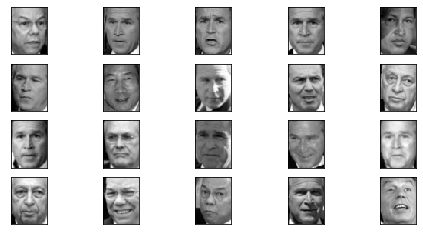

In [20]:
fig

In [18]:
pca = PCA(150).fit(x)

In [19]:
v=pca.components_
v.shape

(150, 2914)

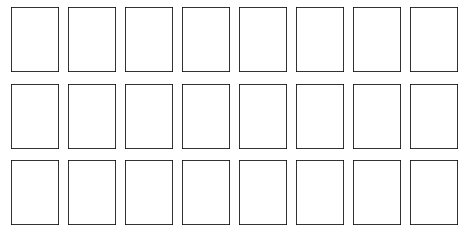

In [22]:
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})

In [24]:
for i, ax in enumerate(axes.flat):
    ax.imshow(v[i,:].reshape(62,47),cmap="gray") #reshape成(62x47)的图像 
#可视化新特征空间V  ("骨架")

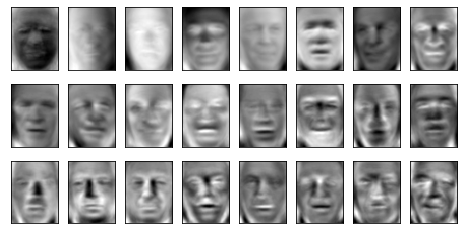

In [25]:
fig
#大部分是由原数据中和"五官"和"亮度"相关的特征中提取出来的

In [29]:
x_dr=pca.transform(x)

In [30]:
x_dr.shape
#压缩为150个特征,没办法画出图了,即以上的"骨架"图包含的特征

(1348, 150)